In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [376]:
path=r"D:\Learning\Python ML\Data\House_Price.csv"

In [377]:
data=pd.read_csv(path)
data.columns

Index(['House_Size_sqft', 'Year_Old', 'Condition_Rating', 'House_Price'], dtype='object')

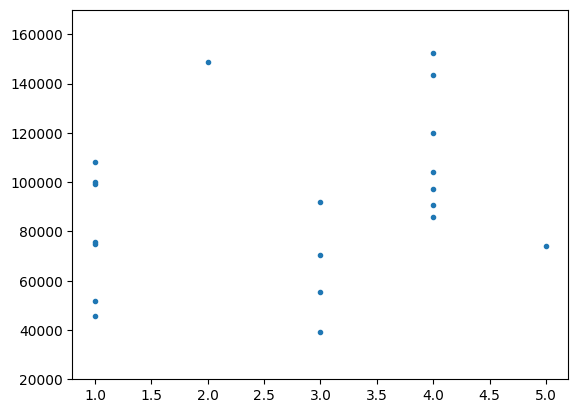

In [378]:
plt.plot(data['Condition_Rating'], data['House_Price'], ".")
plt.ylim(20000, 170000)
plt.show()

### saperate modeling

In [379]:
m,c=np.polyfit(data['Condition_Rating'], data['House_Price'],1)


In [380]:
y_line=m*data['Condition_Rating']+c

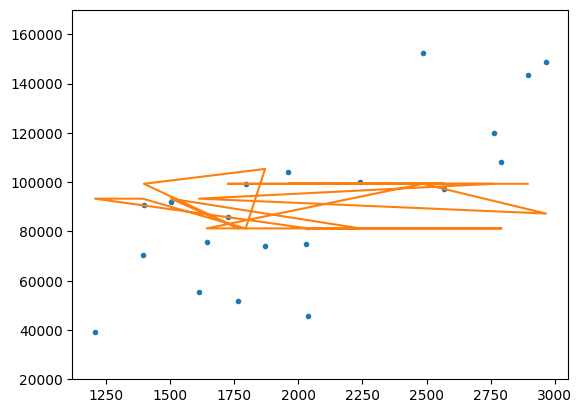

In [381]:
plt.plot(data['House_Size_sqft'], data['House_Price'], ".")
plt.plot(data['House_Size_sqft'], y_line)
plt.ylim(20000, 170000)
plt.show()

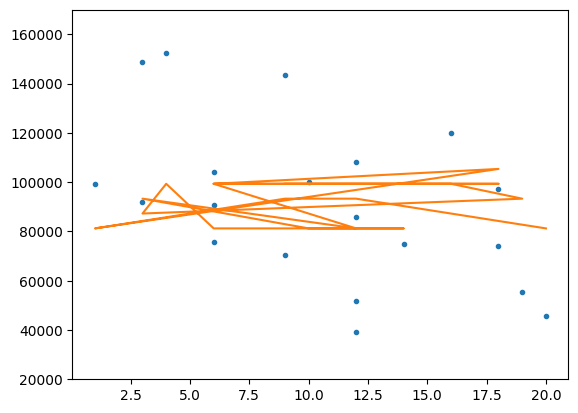

In [382]:
plt.plot(data['Year_Old'], data['House_Price'], ".")
plt.plot(data['Year_Old'], y_line)
plt.ylim(20000, 170000)
plt.show()

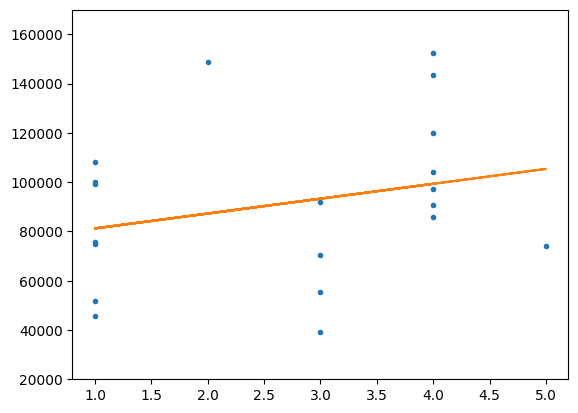

In [383]:

plt.plot(data['Condition_Rating'], data['House_Price'], ".")
plt.plot(data['Condition_Rating'], y_line)
plt.ylim(20000, 170000)
plt.show()

### modeling with 3 independent variables

In [384]:
from sklearn.linear_model import LinearRegression

In [385]:
data.columns

Index(['House_Size_sqft', 'Year_Old', 'Condition_Rating', 'House_Price'], dtype='object')

In [386]:
x= data[['House_Size_sqft','Year_Old', 'Condition_Rating']]
y= data['House_Price']

In [387]:
model=LinearRegression()
model.fit(x, y)

LinearRegression()

In [388]:
m1,m2,m3=model.coef_
c=model.intercept_

In [389]:
line= m1*data['House_Size_sqft'] + m2*data['Year_Old']+ m3*data['Condition_Rating'] + c

In [ ]:
House_Size_sqft=2000
Year_Old=5
Condition_Rating=4

house_price= m1*House_Size_sqft + m2*Year_Old+ m3*Condition_Rating + c
print(f'{house_price:.2f}') # predicted_price[0, 0]:,.2f

117178.41


### with NN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features (X) and target (Y)
X = data[['House_Size_sqft', 'Year_Old', 'Condition_Rating']].values
Y = data['House_Price'].values.reshape(-1, 1)  # Reshape for PyTorch

# Normalize the features
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)  # Standardizing inputs
Y = scaler_Y.fit_transform(Y)  # Standardizing target

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

In [ ]:
class MLR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(3,1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model=MLR()
opt=torch.optim.SGD(model.parameters(), lr=0.001)
loss=nn.MSELoss()

In [ ]:
epochs=1000

for epoch in range(epochs):
    # forward pass
    y_pred=model.forward(X)

    # loss calculation
    l=loss(y_pred,Y)

    # backward pass
    opt.zero_grad()
    l.backward()

    # grad update
    opt.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {l.item():.4f}")


Epoch 0: Loss = 1.4167
Epoch 100: Loss = 0.9583
Epoch 200: Loss = 0.6533
Epoch 300: Loss = 0.4500
Epoch 400: Loss = 0.3142
Epoch 500: Loss = 0.2234
Epoch 600: Loss = 0.1625
Epoch 700: Loss = 0.1216
Epoch 800: Loss = 0.0941
Epoch 900: Loss = 0.0755


In [ ]:
new_house = torch.tensor([[2000, 5, 4]], dtype=torch.float32)  # Example: 2000 sqft, 5 years old, condition 4
new_house_scaled = torch.tensor(scaler_X.transform(new_house), dtype=torch.float32)
predicted_price_scaled = model(new_house_scaled).detach().numpy()
predicted_price = scaler_Y.inverse_transform(predicted_price_scaled.reshape(1, -1))

print(f"Predicted House Price: ${predicted_price[0, 0]:,.2f}")


Predicted House Price: $113,619.66
